# **Predicting Cyberbullying on Social Media Using Machine Learning**

## **Project Overview:**
Welcome to the **Cyberbullying Detection** project notebook! In this project, we aim to develop a machine learning-based solution that identifies and predicts instances of cyberbullying on social media platforms such as Twitter, Instagram, and Facebook. By leveraging advanced algorithms, this project seeks to create a system that can effectively classify text as either **Cyberbullying** or **Non-Cyberbullying**, thereby aiding in timely intervention to prevent harm.

---

### **Dataset Description:**
The analysis will be performed on a social media dataset with the following features:

- **Headline**: The text content of a social media post or comment.  
- **Label**: The classification of the text into one of the following categories:  
  - `-1`: Indicates the presence of cyberbullying.  
  - `1` or `0`: Indicates non-cyberbullying text.  

---

### **Objective:**
The primary objectives of this notebook are to:

1. **Perform Exploratory Data Analysis (EDA)**: Understand the dataset distribution, text properties, and label proportions.  
2. **Preprocess the Data**: Clean, tokenize, and transform the text data into a suitable format for modeling.  
3. **Train and Evaluate Models**: Build machine learning models such as **Support Vector Machines (SVM)**, **Random Forest**, and deep learning models like **CNNs**, then evaluate their performance using metrics such as accuracy, precision, and recall.  
4. **Deployment**: Create an interactive interface to predict cyberbullying in real time for end-users.

---

### **Expected Outcome:**
By the end of this project, we aim to deliver a robust predictive model capable of identifying cyberbullying with high accuracy. This solution will assist social media platforms in monitoring harmful content and protecting users from online abuse.

---

### **Author:**
**[Your Name]**  
(Machine Learning Enthusiast / Your Role or Affiliation)

---

*Let's begin by exploring the dataset and understanding its structure to build a strong foundation for our modeling tasks.*


## Step 1: Data Collection and Data Preparation

In this step, we focus on collecting the necessary data and preparing it for further analysis. The quality and structure of the data are critical to building a successful model. Here's how we approach this:

### **Data Collection:**
- The dataset for this project consists of social media text data that has been labeled as either **Cyberbullying** or **Non-Cyberbullying**.
- We collect the dataset from a relevant source, such as public datasets available from social media platforms, Kaggle, or academic repositories. These datasets usually contain text-based posts or comments with labels indicating the presence or absence of cyberbullying content.

### **Data Overview:**
- After loading the dataset, we perform a quick review of the data to understand its structure, identify missing values, and get an initial sense of the distribution of categories.
- For example, we check if the dataset contains fields like `text` (post content) and `label` (cyberbullying classification).

### **Data Cleaning:**
- **Removing Irrelevant Data:** We remove any irrelevant columns that are not necessary for the prediction model.
- **Handling Missing Values:** Missing or incomplete data can affect model performance. We handle missing values by either imputing them or removing the rows with missing data.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
df=pd.read_csv('/content/dataset.csv')

In [3]:
#displaying the first 5 rows of the dataset
df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


In [4]:
#displaying the last 5 rows of the dataset
df.tail()

,headline,label
18143,deepak chahal se baga chutiya maine nahi dekha...,-1
18144,carry ki maa ki chut,-1
18145,ram kapoor ko priya se pyaar hai kya ?,0
18146,kya ram kapoor ki behen ke chut mai mera lund ...,-1
18147,akshay kumar ki film aise aa rahi hai jaise su...,-1


In [5]:
#getting the shape of the dataset (rows, columns)
df.shape

(18148, 2)

In [6]:
#displaying the total number of elements in the dataset
df.size

36296

In [7]:
#displaying the data types of each column in the dataset
df.dtypes

,0
headline,object
label,int64


In [8]:
#displaying the list of column names in the dataset
df.columns.tolist()

['headline', 'label']

In [9]:
#checking for missing values
df.isnull().sum()

,0
headline,0
label,0


# Step 2: Exploratory Data Analysis (EDA)

In this step, we perform exploratory data analysis to gain insights into the dataset, understand its structure, and uncover patterns that may influence the machine learning model's performance. Here's how we approach this:


*   *Label Distribution* :
Understanding Class Balance: Count the occurrences of each label (cyberbullying vs. non-cyberbullying) to check if the dataset is balanced.
*   A bar chart provides a visual understanding of the distribution.





label
-1    11661
 0     6487
Name: count, dtype: int64


<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

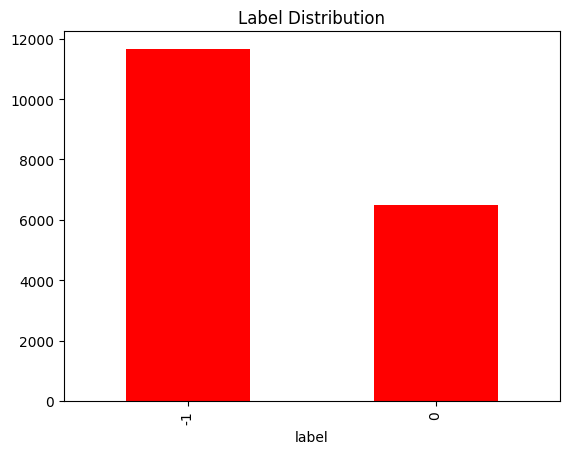

In [26]:
label_counts = df['label'].value_counts()
print(label_counts)
label_counts.plot(kind='bar', title='Label Distribution',color = 'red')


Text Analysis:
Text Length Distribution: Analyze the length of the text in terms of characters or words.



<Axes: title={'center': 'Text Length Distribution'}, ylabel='Frequency'>

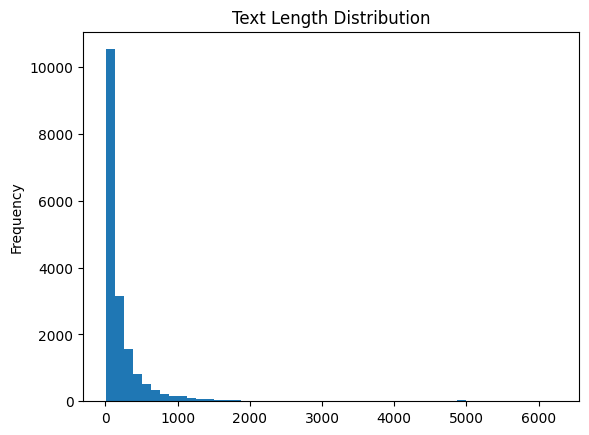

In [27]:
df['text_length'] = df['headline'].apply(len)
df['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')


Basic Statistics: Compute average, minimum, and maximum text length.



In [28]:
print(df['text_length'].describe())


count    18148.000000
mean       265.553009
std        560.191912
min          3.000000
25%         45.000000
50%        103.000000
75%        248.000000
max       6249.000000
Name: text_length, dtype: float64


**Word Frequency Analysis:** Identify frequently occurring words in the dataset

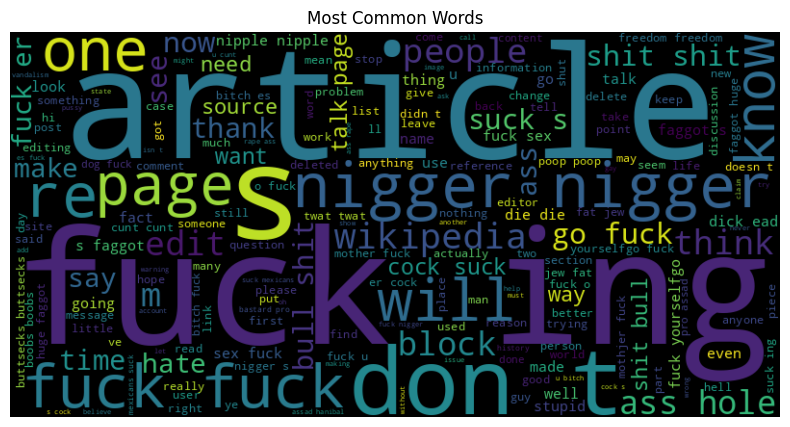

In [29]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text
all_words = ' '.join(df['headline'])
wordcloud = WordCloud(width=800, height=400).generate(all_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()


**Handling Missing Values**
Check for Missing Values: Identify columns with missing data and their proportions.

In [14]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


**Outlier Detection**
Box Plot for Text Length: Visualize outliers in text length

<Axes: xlabel='text_length'>

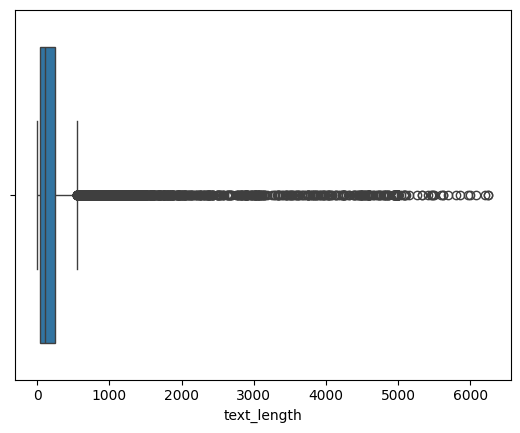

In [15]:
import seaborn as sns
sns.boxplot(x=df['text_length'])


**Label-Based Group Analysis**
Average Text Length per Label: Understand how text properties vary with labels.



label
-1    214.654661
 0    357.047634
Name: text_length, dtype: float64


<Axes: title={'center': 'Average Text Length by Label'}, xlabel='label'>

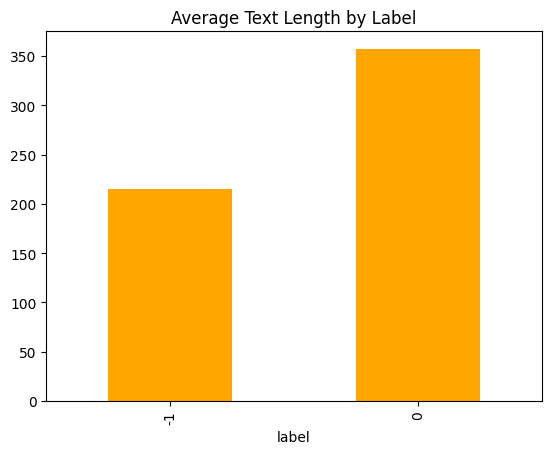

In [25]:
avg_text_length = df.groupby('label')['text_length'].mean()
print(avg_text_length)
avg_text_length.plot(kind='bar', title='Average Text Length by Label',color='orange')


**Correlation Analysis**
Correlation with Target Variable: Analyze if any numerical feature correlates with the label.



In [23]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
df['text_length'] = df['headline'].apply(len)
correlation_matrix = df[['text_length', 'label']].corr()


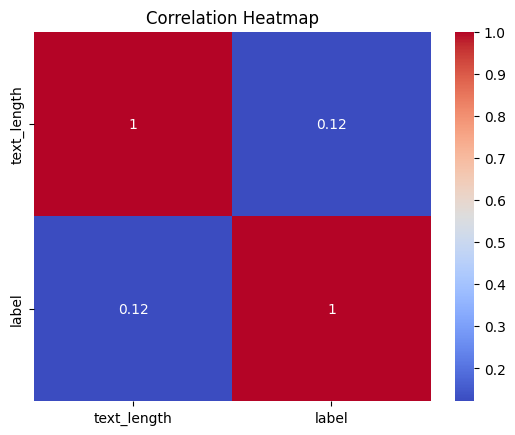

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
